In [98]:
import pandas as pd

In [99]:
data_train = pd.read_csv("Train_finish.csv")
data_test = pd.read_csv("Test_finish.csv")

In [100]:
data_train

,DienTich,Phongngu,SoTang,PhongTam,Loai,GiayTo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem
0,62.0,2.0,1.0,2.0,2,2,1,5,5,1
1,95.0,3.0,35.0,2.0,2,1,2,1,3,1
2,75.0,2.0,5.0,2.0,2,0,3,7,7,1
3,70.0,1.0,7.0,1.0,2,1,2,7,3,1
4,83.0,2.0,25.0,2.0,2,2,2,3,6,1
...,...,...,...,...,...,...,...,...,...,...
24014,53.0,2.0,19.0,1.0,2,1,1,5,4,1
24015,76.0,2.0,1.0,1.0,2,2,2,5,7,1
24016,115.0,2.0,25.0,2.0,2,2,2,3,4,1
24017,82.0,2.0,1.0,2.0,2,2,3,7,3,1


In [101]:
data_test

,USD
0,83
1,220
2,107
3,166
4,122
...,...
24014,87
24015,64
24016,137
24017,110


In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [103]:
df= data_train.copy()

In [104]:
df['USD'] = data_test

In [105]:
df

,DienTich,Phongngu,SoTang,PhongTam,Loai,GiayTo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,USD
0,62.0,2.0,1.0,2.0,2,2,1,5,5,1,83
1,95.0,3.0,35.0,2.0,2,1,2,1,3,1,220
2,75.0,2.0,5.0,2.0,2,0,3,7,7,1,107
3,70.0,1.0,7.0,1.0,2,1,2,7,3,1,166
4,83.0,2.0,25.0,2.0,2,2,2,3,6,1,122
...,...,...,...,...,...,...,...,...,...,...,...
24014,53.0,2.0,19.0,1.0,2,1,1,5,4,1,87
24015,76.0,2.0,1.0,1.0,2,2,2,5,7,1,64
24016,115.0,2.0,25.0,2.0,2,2,2,3,4,1,137
24017,82.0,2.0,1.0,2.0,2,2,3,7,3,1,110


In [106]:
df['DienTich'] = df['DienTich'].astype(str)
df['USD'] = df['USD'].astype(str)

In [107]:
df['content'] = df[['DienTich','USD']].astype(str).apply(lambda x: '/'.join(x) , axis =1)

In [108]:
df

,DienTich,Phongngu,SoTang,PhongTam,Loai,GiayTo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,USD,content
0,62.0,2.0,1.0,2.0,2,2,1,5,5,1,83,62.0/83
1,95.0,3.0,35.0,2.0,2,1,2,1,3,1,220,95.0/220
2,75.0,2.0,5.0,2.0,2,0,3,7,7,1,107,75.0/107
3,70.0,1.0,7.0,1.0,2,1,2,7,3,1,166,70.0/166
4,83.0,2.0,25.0,2.0,2,2,2,3,6,1,122,83.0/122
...,...,...,...,...,...,...,...,...,...,...,...,...
24014,53.0,2.0,19.0,1.0,2,1,1,5,4,1,87,53.0/87
24015,76.0,2.0,1.0,1.0,2,2,2,5,7,1,64,76.0/64
24016,115.0,2.0,25.0,2.0,2,2,2,3,4,1,137,115.0/137
24017,82.0,2.0,1.0,2.0,2,2,3,7,3,1,110,82.0/110


In [109]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['content'])

In [110]:
tfidf_matrix.shape

(24019, 445)

In [111]:
print(tfidf_matrix)

  (0, 418)	0.7422776185195255
  (0, 371)	0.6700924839490305
  (1, 165)	0.7806872785016927
  (1, 438)	0.6249218936680171
  (2, 19)	0.8356133427633377
  (2, 399)	0.5493180694241551
  (3, 102)	0.8235765516038108
  (3, 389)	0.5672051336583401
  (4, 44)	0.7824988042389326
  (4, 418)	0.6226520869351041
  (5, 416)	0.7666326610192395
  (5, 392)	0.6420859467848209
  (6, 28)	0.8500811610902657
  (6, 392)	0.5266517061203029
  (7, 406)	0.6897763324108505
  (7, 19)	0.7240225212283357
  (8, 358)	0.7779271695711734
  (8, 340)	0.6283544531894263
  (9, 298)	1.0
  (10, 414)	0.6656011471554532
  (10, 406)	0.746307652985915
  (11, 296)	0.7315995402885335
  (11, 312)	0.6817346350667587
  (12, 364)	0.681278345937889
  (12, 416)	0.7320244636322847
  :	:
  (24006, 358)	0.7824835152446805
  (24007, 402)	0.7654776194178786
  (24007, 380)	0.6434625196313593
  (24008, 420)	0.5658542373698123
  (24008, 380)	0.8245052953442009
  (24009, 20)	0.8326239570262177
  (24009, 399)	0.5538387366246634
  (24010, 33)	0.796458

In [112]:
cosine_similarities =cosine_similarity(count_matrix, count_matrix)

In [113]:
print(cosine_similarities.shape)

(24019, 24019)


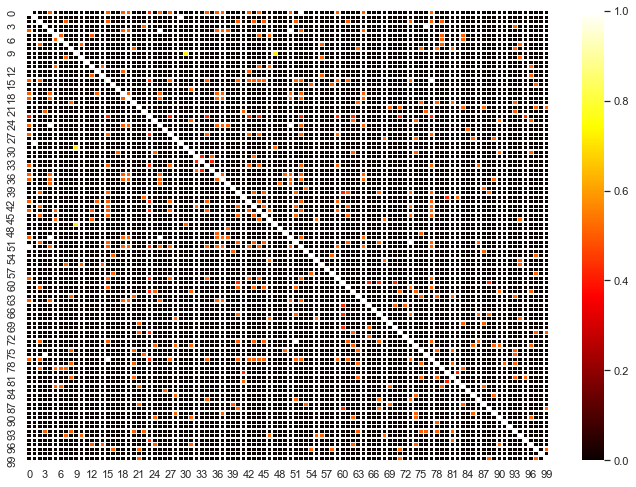

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(cosine_similarities[0:100,0:100], linewidth=0.5,cmap='hot' )
#plt.show()

#plt.imshow(cosine_sim[0:100,0:100], cmap='hot', interpolation='nearest')
plt.show()

In [115]:
indices = pd.Series(df.index,index=df['content'])
indices

content
62.0/83          0
95.0/220         1
75.0/107         2
70.0/166         3
83.0/122         4
             ...  
53.0/87      24014
76.0/64      24015
115.0/137    24016
82.0/110     24017
60.0/79      24018
Length: 24019, dtype: int64

In [116]:
def get_recommend_houses(title,cosine_similarities=cosine_similarities):
    #Lấy index của bộ film theo tiêu đề đưa vào
    idx=indices[title]
    #Lấy điểm tương đồng theo cặp của tất cả các movies theo tiêu đề bộ film đưa vào
    sim_scores = list(enumerate(cosine_similarities[idx]))
    #Sắp xếp các bộ film dựa theo điểm tương đồng
    sim_scores = sorted(sim_scores, key=lambda x: x[0], reverse=True)
    #Lấy điểm của 15 bộ film có độ tương đồng cao nhất
    sim_scores_15 = sim_scores[1:16]
    #Lấy index tương ứng với 15 bộ film này
    movies_index = [i[0] for i in sim_scores_15]
    #trả ra tiêu đề của 15 bộ film
    return df[['DienTich','SoTang','USD']].iloc[movies_index]

In [117]:
get_recommend_houses('115.0/137')

,DienTich,SoTang,USD
9,40.0,1.0,6
8,50.0,3.0,57
7,78.0,9.0,107
6,71.0,1.0,113
5,71.0,1.0,82
4,83.0,25.0,122
3,70.0,7.0,166
2,75.0,5.0,107
1,95.0,35.0,220
0,62.0,1.0,83
